In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from scipy import stats
import Util
import algo_util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Took 1 tries


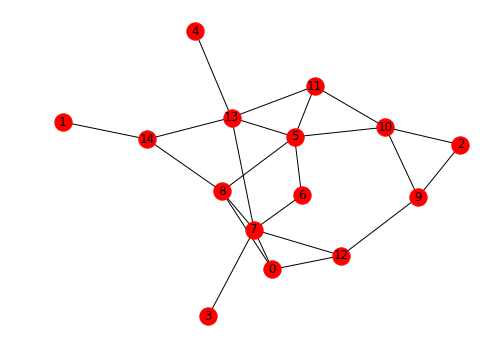

In [2]:
p = 15
adj = algo_util.generate_connected_mat(p, output = True)

In [12]:
cov = algo_util.adj_to_cov(adj)
prec = np.linalg.inv(cov)
print(np.linalg.eigvals(prec))

[5.95848151 4.25516763 3.57546557 3.39794837 3.21430548 3.32059584
 2.60246066 2.09055213 1.90009123 0.55815083 1.39039091 1.34852859
 1.1273698  0.94553068 0.87497877]


In [15]:
N = 100000

In [16]:
sample = np.random.multivariate_normal(np.zeros(p), cov, size = N)

In [75]:
#batches = np.array_split(sample, int(np.sqrt(N)))
batches = np.array_split(sample, int(np.log(N)))

In [77]:
print(np.sqrt(N), batches[0].shape)
print(len(batches))

316.22776601683796 (9091, 15)
11


In [78]:
print(Util.get_S(adj))

5


In [81]:
#We have hypothesis graph, with full adjacency matrix
#For hypothesis edge in adjacency matrix between (k, l)
#(best case)
#Try random subsets with neigh (k) + 
#random vertex in connected component + l
#if partial correlation is ever negative in any batch, remove edge

for k in range(p):
    neighs, not_neighs = algo_util.get_connections(k, adj)
    for l in not_neighs:
        removed = False
        subsets = algo_util.assemble_subsets(adj, k, l, num = 1000)
        for subset in subsets:
            if removed:
                break
            #print(subset)
            for b in batches:
                rho = algo_util.get_partial_correlation(b, subset, k, l)
                #print(rho)
                if rho >= 0:
                    print("Removed {} {}".format(k, l))
                    removed = True
                    break
        if not removed and len(subsets) > 0:
            print("Edge between k={}, l={} would not be removed!".format(k,l))
        else:
            pass
            #print("Removed edge between k={}, l={} successfully".format(k,l))

Removed 0 1
Removed 0 2
Removed 0 4
Removed 0 5
Removed 0 6
Removed 0 9
Removed 0 10
Removed 0 11
Removed 0 13
Removed 0 14
Removed 1 0
Removed 1 2
Removed 1 3
Removed 1 4
Removed 1 5
Removed 1 6
Removed 1 7
Removed 1 8
Removed 1 9
Removed 1 10
Removed 1 11
Removed 1 12
Removed 1 13
Removed 2 0
Removed 2 1
Removed 2 3
Removed 2 4
Removed 2 5
Removed 2 6
Removed 2 7
Removed 2 8
Removed 2 11
Removed 2 12
Removed 2 13
Removed 2 14
Removed 3 0
Removed 3 1
Removed 3 2
Removed 3 4
Removed 3 5
Removed 3 6
Removed 3 8
Removed 3 9
Removed 3 10
Removed 3 11
Removed 3 12
Removed 3 13
Removed 3 14
Removed 4 0
Removed 4 1
Removed 4 2
Removed 4 3
Removed 4 5
Removed 4 6
Removed 4 7
Removed 4 8
Removed 4 9
Removed 4 10
Removed 4 11
Removed 4 12
Removed 4 14
Removed 5 0
Removed 5 1
Removed 5 2
Removed 5 3
Removed 5 7
Removed 5 9
Removed 5 12
Removed 5 14
Removed 6 0
Removed 6 1
Removed 6 2
Removed 6 4
Removed 6 8
Removed 6 9
Removed 6 10
Removed 6 11
Removed 6 12
Removed 6 13
Removed 6 14
Removed 7 1


In [82]:
for k in range(p):
    neighs, not_neighs = algo_util.get_connections(k, adj)
    for l in neighs: #makes sure neighbors aren't removed
        print(k, l)
        removed = False
        subsets = []
        for _ in range(100): #10 subsets
            rand_verts = np.random.choice(p, size = 5, replace = False)
            subset = sorted(list(set(list(rand_verts) + [k, l])))
            subsets.append(subset)
        for subset in subsets:
            if removed:
                break
            #print(subset)
            for b in batches:
                rho = algo_util.get_partial_correlation(b, subset, k, l)
                #print(rho)
                if rho >= 0:
                    print(subset, rho)
                    print("Removed {} {}".format(k, l))
                    removed = True
                    break
        if removed:
            print("Edge between k={}, l={} erroneously removed!".format(k,l))
        else:
            pass
            #print("Removed edge between k={}, l={} successfully".format(k,l))

0 7
0 8
0 12
1 14
2 9
2 10
3 7
4 13
5 6
5 8
5 10
5 11
5 13
6 5
6 7
7 0
7 3
7 6
7 8
7 12
7 13
8 0
8 5
8 7
8 14
9 2
9 10
9 12
10 2
10 5
10 9
10 11
11 5
11 10
11 13
12 0
12 7
12 9
13 4
13 5
13 7
13 11
13 14
14 1
14 8
14 13
